# Machine Learning Capstone Project

## Create CIFAR 15

### Import required packages

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

### Extract CIFAR 100

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
cifar_100_meta = unpickle("cifar-100-python/meta")
cifar_100_train = unpickle("cifar-100-python/train")
cifar_100_test = unpickle("cifar-100-python/test")

### Visualize CIFAR 100

#### Coarse labels in CIFAR 100

In [4]:
print("***********************CIFAR-100 Superclasses***********************")
for i in range(10):
    index = i*2
    index1 = index
    index2 = index + 1
    label1 = cifar_100_meta[b'coarse_label_names'][index1].decode('utf-8')
    label2 = cifar_100_meta[b'coarse_label_names'][index2].decode('utf-8')
    print('{:2} {:30} {:2} {:30}'.format(index1, label1, index2, label2))

***********************CIFAR-100 Superclasses***********************
 0 aquatic_mammals                 1 fish                          
 2 flowers                         3 food_containers               
 4 fruit_and_vegetables            5 household_electrical_devices  
 6 household_furniture             7 insects                       
 8 large_carnivores                9 large_man-made_outdoor_things 
10 large_natural_outdoor_scenes   11 large_omnivores_and_herbivores
12 medium_mammals                 13 non-insect_invertebrates      
14 people                         15 reptiles                      
16 small_mammals                  17 trees                         
18 vehicles_1                     19 vehicles_2                    


#### Fine labels in CIFAR 100

In [5]:
print("************************************CIFAR-100 Classes************************************")
for i in range(20):
    index = i*5
    index1 = index
    index2 = index + 1
    index3 = index + 2
    index4 = index + 3
    index5 = index + 4
    label1 = cifar_100_meta[b'fine_label_names'][index1].decode('utf-8')
    label2 = cifar_100_meta[b'fine_label_names'][index2].decode('utf-8')
    label3 = cifar_100_meta[b'fine_label_names'][index3].decode('utf-8')
    label4 = cifar_100_meta[b'fine_label_names'][index4].decode('utf-8')
    label5 = cifar_100_meta[b'fine_label_names'][index5].decode('utf-8')
    print('{:2} {:15} {:2} {:15} {:2} {:15} {:2} {:15} {:2} {:15}'.format(index1, label1, index2, label2, index3, label3, index4, label4, index5, label5))

************************************CIFAR-100 Classes************************************
 0 apple            1 aquarium_fish    2 baby             3 bear             4 beaver         
 5 bed              6 bee              7 beetle           8 bicycle          9 bottle         
10 bowl            11 boy             12 bridge          13 bus             14 butterfly      
15 camel           16 can             17 castle          18 caterpillar     19 cattle         
20 chair           21 chimpanzee      22 clock           23 cloud           24 cockroach      
25 couch           26 crab            27 crocodile       28 cup             29 dinosaur       
30 dolphin         31 elephant        32 flatfish        33 forest          34 fox            
35 girl            36 hamster         37 house           38 kangaroo        39 keyboard       
40 lamp            41 lawn_mower      42 leopard         43 lion            44 lizard         
45 lobster         46 man             47 maple_tree    

In [6]:
def cifar100_plot(data, meta, im_idx=0):
    im = data[b'data'][im_idx, :]

    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)

    img = np.dstack((im_r, im_g, im_b))

    print("shape: ", img.shape)
    print("filename: ", data[b'filenames'][im_idx])
    print("coarse category:", meta[b'coarse_label_names'][data[b'coarse_labels'][im_idx]])     
    print("fine category:", meta[b'fine_label_names'][data[b'fine_labels'][im_idx]])        

    plt.imshow(img) 
    plt.show()

shape:  (32, 32, 3)
filename:  b'bos_taurus_s_000507.png'
coarse category: b'large_omnivores_and_herbivores'
fine category: b'cattle'


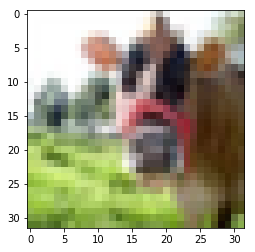

In [7]:
cifar100_plot(cifar_100_train, cifar_100_meta, 0)

### Downselect from CIFAR 100 to create CIFAR 15

In [8]:
cifar_15_meta = {b'coarse_label_names':[b'people', b'vehicles_1', b'vehicles_2'], b'fine_label_names':[b'baby', b'bicycle', b'boy', b'bus', b'girl', b'lawn_mower', b'man', b'motorcycle', b'pickup_truck', b'rocket', b'streetcar', b'tank', b'tractor', b'train', b'woman']}

#### Coarse labels in CIFAR 15

In [9]:
print("**CIFAR-15 Superclasses**")
for i in range(3):
    index = i*1
    index1 = index
    label1 = cifar_15_meta[b'coarse_label_names'][index1].decode('utf-8')
    print('{:2} {:30}'.format(index1, label1))

**CIFAR-15 Superclasses**
 0 people                        
 1 vehicles_1                    
 2 vehicles_2                    


#### Fine labels in CIFAR 15

In [10]:
print("*******************CIFAR-15 Classes*******************")
for i in range(5):
    index = i*3
    index1 = index
    index2 = index + 1
    index3 = index + 2
    label1 = cifar_15_meta[b'fine_label_names'][index1].decode('utf-8')
    label2 = cifar_15_meta[b'fine_label_names'][index2].decode('utf-8')
    label3 = cifar_15_meta[b'fine_label_names'][index3].decode('utf-8')
    print('{:2} {:15} {:2} {:15} {:2} {:15}'.format(index1, label1, index2, label2, index3, label3))

*******************CIFAR-15 Classes*******************
 0 baby             1 bicycle          2 boy            
 3 bus              4 girl             5 lawn_mower     
 6 man              7 motorcycle       8 pickup_truck   
 9 rocket          10 streetcar       11 tank           
12 tractor         13 train           14 woman          


#### Map CIFAR 100 labels to CIFAR 15 labels

In [11]:
cifar100_to_cifar15_label_mapping = {b'coarse_label_names':[], b'fine_label_names':[]}
for label in cifar_15_meta[b'coarse_label_names']:
    cifar100_to_cifar15_label_mapping[b'coarse_label_names'].append(cifar_100_meta[b'coarse_label_names'].index(label))
for label in cifar_15_meta[b'fine_label_names']:
    cifar100_to_cifar15_label_mapping[b'fine_label_names'].append(cifar_100_meta[b'fine_label_names'].index(label))

In [12]:
def findNumOfDownselectedData(data, downselected_labels):
    num_of_downselected_data = 0
    for label in data[b'coarse_labels']:
        if label in downselected_labels:
            num_of_downselected_data += 1
    return num_of_downselected_data    

In [13]:
def downselectData(data, label_map):
    num_of_downselected_data = findNumOfDownselectedData(data, label_map[b'coarse_label_names'])
    downselected_data = {b'filenames':[], b'coarse_labels':[], b'fine_labels':[], b'data':np.empty(shape = (num_of_downselected_data, 3072), dtype=np.uint8)}
    src_index = 0
    dst_index = 0
    for label in data[b'coarse_labels']:
        if label in label_map[b'coarse_label_names']:
            downselected_data[b'filenames'].append(data[b'filenames'][src_index])
            downselected_data[b'coarse_labels'].append(label_map[b'coarse_label_names'].index(data[b'coarse_labels'][src_index]))
            downselected_data[b'fine_labels'].append(label_map[b'fine_label_names'].index(data[b'fine_labels'][src_index]))
            downselected_data[b'data'][dst_index] = data[b'data'][src_index]
            dst_index += 1
        src_index += 1
            
    return downselected_data    

In [14]:
cifar_15_train = downselectData(cifar_100_train, cifar100_to_cifar15_label_mapping)
cifar_15_test = downselectData(cifar_100_test, cifar100_to_cifar15_label_mapping)

### Visualize CIFAR 15

In [15]:
def cifar15_plot(data, meta, im_idx=0):
    im = data[b'data'][im_idx, :]

    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)

    img = np.dstack((im_r, im_g, im_b))

    print("shape: ", img.shape)
    print("filename: ", data[b'filenames'][im_idx])
    print("coarse category:", meta[b'coarse_label_names'][data[b'coarse_labels'][im_idx]])     
    print("fine category:", meta[b'fine_label_names'][data[b'fine_labels'][im_idx]])        

    plt.imshow(img) 
    plt.show()

shape:  (32, 32, 3)
filename:  b'pickup_truck_s_000629.png'
coarse category: b'vehicles_1'
fine category: b'pickup_truck'


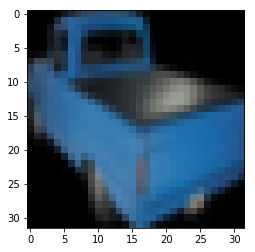

In [16]:
cifar15_plot(cifar_15_train, cifar_15_meta, 400)

### Save CIFAR 15

In [17]:
def saveData(data, directory, filename):
    if not os.path.exists(directory):
        os.makedirs(directory)
    fname = os.path.join(directory, filename)
    with open(fname, 'wb') as f:
        pickle.dump(data, f)

In [18]:
saveData(cifar_15_train, 'cifar-15-python', 'train')
saveData(cifar_15_test, 'cifar-15-python', 'test')
saveData(cifar_15_meta, 'cifar-15-python', 'meta')